In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#fuel_data = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')

In [4]:
fuel_data = pd.read_csv('fuel_data.csv')

In [5]:
fuel_data.head() #checks out the first five rows of fuel_data dataframe

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [6]:
fuel_data.info() #basic info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [7]:
fuel_data.isnull().sum() #checks total total number of missing values

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [8]:
fuel_data['fuel_unit'].fillna('mcf', inplace = True) #fills the missing elements in the dataframe with 'mcf'

In [9]:
fuel_data.head(10) #checks the first ten rows of the dataframe

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.77,2.77,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.24,43.25,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.77,0.00,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133.0,24.840000,58.54,55.13,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520.0,24.290000,33.97,34.65,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233.0,22.484000,28.73,28.11,1.278


In [10]:
fuel_data['plant_name_ferc1'].nunique() #number of unique plants

2315

In [11]:
fuel_data.describe() #Basic statistical description of the dataframe

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [12]:
#create a 'total_fuel_cost' column

fuel_data['total_fuel_cost'] = fuel_data['fuel_qty_burned'] * fuel_data['fuel_cost_per_unit_burned']

In [13]:
#create a total_energy_gen in kWh column
# 1 mmbtu = 1000000btu and 1btu = 0.000293071kWh
fuel_data['Total_energy_gen(kWh)'] = fuel_data['fuel_mmbtu_per_unit'] * 1000000 * 0.000293071

In [14]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_fuel_cost,Total_energy_gen(kWh)
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07,4862.047890
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08,4862.634032
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08,7071.803230
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08,7019.050450
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,1.122764e+05,293.071000


In [15]:
#checks the unique fuel types

fuel_data['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [21]:
#group dataframe by fuel types and calculate the mean of each numeric column

mean_vals = fuel_data.groupby(fuel_data['fuel_type_code_pudl'], as_index=False).mean()

In [22]:
mean_vals

,fuel_type_code_pudl,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_fuel_cost,Total_energy_gen(kWh)
0,coal,115.637534,2004.623143,1.903473e+06,20.762780,67.421830,116.951141,1.787190,1.364379e+08,6084.968784
1,gas,124.122062,2005.978060,4.843183e+06,1.021913,13.659397,12.095172,5.408876,5.377718e+07,299.492940
2,nuclear,107.397311,2002.970660,5.454838e+06,17.582120,4955.157002,28616.915039,1.716559,1.030336e+08,5152.809456
3,oil,113.236235,2007.195933,6.311677e+04,5.814377,168.877086,313.907691,12.698732,5.009150e+06,1704.025268
4,other,110.467066,2001.700599,2.948137e+06,0.572752,18.253856,16.871485,155.084910,2.059186e+06,167.857110
5,waste,154.253968,2005.650794,1.171914e+05,0.341163,19.518122,18.413052,822.709937,2.481652e+06,99.984913


Text(0.5, 1.0, 'Fig 1: Mean Total Fuel Costs Based on Fuel Types')

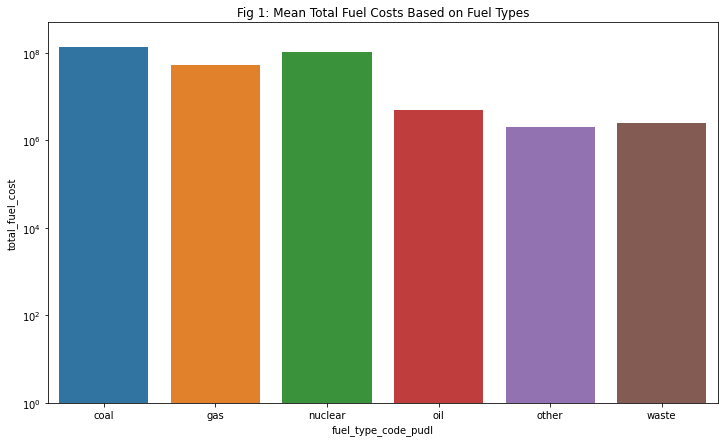

In [24]:
plt.figure(figsize = (12,7)) # create a blank plot platform of size 12 x 7 (B x L, respectively)

#barplot of mean total fuel cost  of plants based on fuel types
tfc = sns.barplot(data=mean_vals, x='fuel_type_code_pudl',y='total_fuel_cost')

#convert y axis to logarithm due to large values
tfc.set_yscale('log')

#set range of y axis value (from 1 to 150000000)
tfc.set_ylim(1,500000000)
plt.title('Fig 1: Mean Total Fuel Costs Based on Fuel Types') #set title

Text(0.5, 1.0, 'Fig 2: Mean Total Energy Generations Based on Fuel Types')

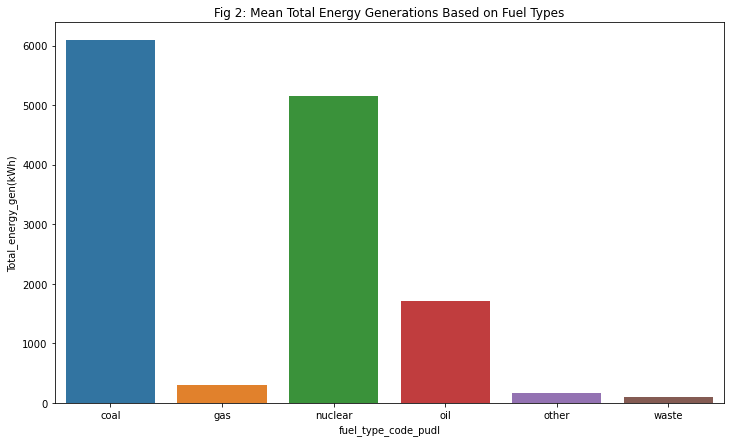

In [25]:
plt.figure(figsize = (12,7)) # create a blank plot platform of size 12 x 7 (B x L, respectively)

#create a barplot of mean total energy generation of plants based on fuel types
sns.barplot(data=mean_vals, x='fuel_type_code_pudl',y='Total_energy_gen(kWh)')

plt.title('Fig 2: Mean Total Energy Generations Based on Fuel Types') #set title

Text(0.5, 1.0, 'Fig 1: Mean Total Fuel Quantity Burned based on Fuel Types')

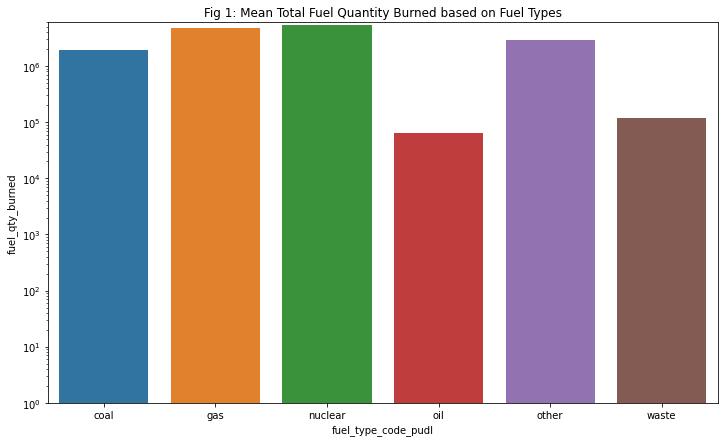

In [26]:
plt.figure(figsize=(12,7)) # create a blank plot platform of size 12 x 7 (B x L, respectively)

#create a barplot of mean total fuel quantity burned by plants based on fuel types
fqb = sns.barplot(data = mean_vals, x = 'fuel_type_code_pudl', y = 'fuel_qty_burned')

#convert y axis to logarithm due to large values
fqb.set_yscale('log')

#set range of y axis value (from 1 to 6000000)
fqb.set_ylim(1,6000000)
plt.title('Fig 1: Mean Total Fuel Quantity Burned based on Fuel Types') #set title

In [27]:
fuel_data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu',
       'total_fuel_cost', 'Total_energy_gen(kWh)'],
      dtype='object')

Text(0.5, 1.0, 'Fig 2: Mean MMBTU Per Unit of Fuel Based on Fuel Types')

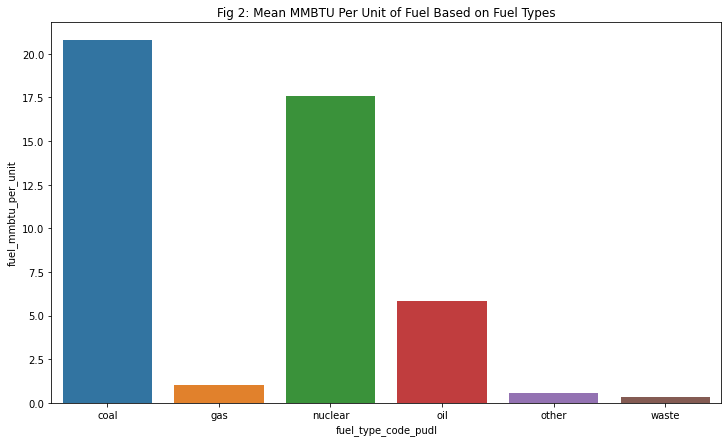

In [28]:
plt.figure(figsize = (12,7)) # create a blank plot platform of size 12 x 7 (B x L, respectively)

#create a barplot of mean mmbtu per unit of fuel based on fuel types
sns.barplot(data=mean_vals, x='fuel_type_code_pudl',y='fuel_mmbtu_per_unit')

plt.title('Fig 2: Mean MMBTU Per Unit of Fuel Based on Fuel Types') #set title

Text(0.5, 1.0, 'Fig 2: Mean Fuel Cost Per Unit Burned Based on Fuel Types')

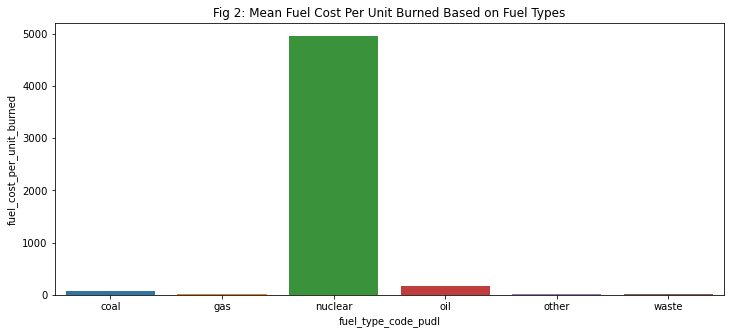

In [30]:
plt.figure(figsize = (12,5)) # create a blank plot platform of size 12 x 7 (B x L, respectively)

#create a barplot of mean fuel cost per unit burned based on fuel types
sns.barplot(data=mean_vals, x='fuel_type_code_pudl',y='fuel_cost_per_unit_burned')

plt.title('Fig 2: Mean Fuel Cost Per Unit Burned Based on Fuel Types') #set title

Text(0.5, 1.0, 'Fig 2: Mean Fuel Cost Per MMBTU Based on Fuel Types')

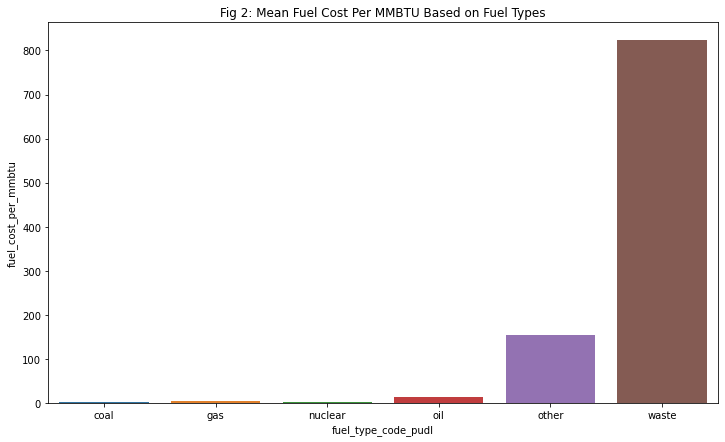

In [31]:
plt.figure(figsize = (12,7)) # create a blank plot platform of size 12 x 7 (B x L, respectively)

#create a barplot of mean fuel cost per mmbtu based on fuel types
sns.barplot(data=mean_vals, x='fuel_type_code_pudl',y='fuel_cost_per_mmbtu')

plt.title('Fig 2: Mean Fuel Cost Per MMBTU Based on Fuel Types') #set title

Text(0.5, 1.0, 'Fig 2: Mean Fuel Cost Per Unit Delivered Based on Fuel Types')

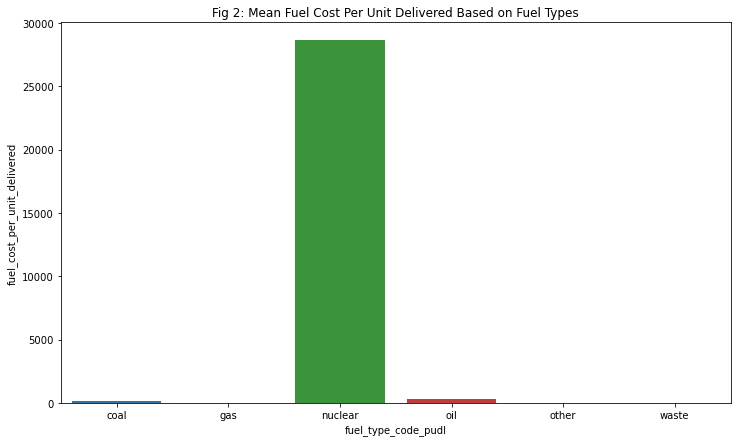

In [32]:
plt.figure(figsize = (12,7)) # create a blank plot platform of size 12 x 7 (B x L, respectively)

#create a barplot of mean fuel cost per unit delivered based on fuel types
sns.barplot(data=mean_vals, x='fuel_type_code_pudl',y='fuel_cost_per_unit_delivered')

plt.title('Fig 2: Mean Fuel Cost Per Unit Delivered Based on Fuel Types') #set title